In [51]:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import numpy as np

from dwd import DWD, KernGDWD
from dwd.viz import ABLine2D, clf2D_slope_intercept, get_mesh_grid

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])


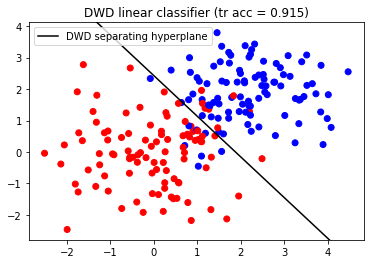

In [60]:
# sample sythetic training data
X, y = make_blobs(n_samples=200, n_features=2,
                  centers=[[0, 0],
                           [2, 2]])

# fit DWD classifier
dwd = DWD(C='auto').fit(X, y)

# compute training accuracy
tr_acc = dwd.score(X, y)

# plot points and DWD separting hyperplane
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
ABLine2D(*clf2D_slope_intercept(clf=dwd),
         color='black',
         label='DWD separating hyperplane')
plt.title('DWD linear classifier (tr acc = {})'.format(tr_acc))
plt.legend()

Text(0.5, 1.0, 'DWD with Gaussian Kernel (tr acc = 0.915)')

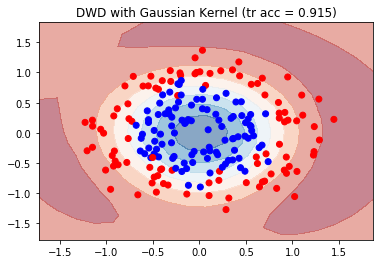

In [79]:
# sample some non-linear, toy data
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=1)

# fit kernel DWD wit gaussian kernel
kdwd = KernGDWD(lambd=.1, kernel='rbf',
                kernel_kws={'gamma': 1}).fit(X, y)

# compute training accuracy
tr_acc = kdwd.score(X, y)

# visualze the decision function and training points
X_mesh, xx, yy = get_mesh_grid(X)
f = kdwd.decision_function(X_mesh)
f = f.reshape(xx.shape)
plt.contourf(xx, yy, f, cmap=cm, alpha=.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.title('DWD with Gaussian Kernel (tr acc = {})'.format(tr_acc))

# for readme

In [1]:
from sklearn.datasets import make_blobs, make_circles
from dwd.dwd import DWD
from dwd.gen_kern_dwd import KernGDWD


# sample sythetic training data
X, y = make_blobs(n_samples=200, n_features=2,
                  centers=[[0, 0],
                           [2, 2]])

# fit DWD classifier
dwd = DWD(C='auto').fit(X, y)

# compute training accuracy
dwd.score(X, y)

0.94

In [2]:
# sample some non-linear, toy data
X, y = make_circles(n_samples=200, noise=0.2, factor=0.5, random_state=1)

# fit kernel DWD wit gaussian kernel
kdwd = KernGDWD(lambd=.1, kernel='rbf',
                kernel_kws={'gamma': 1}).fit(X, y)

# compute training accuracy
kdwd.score(X, y)

0.915